In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ast
from IPython.display import clear_output
import time

In [2]:
# Get Cross correlations & respective frame numbers along all single-cell trajectories
def get_cross_corr_all_single_cell_trajs(filename):
      cross_corr_trajs = []
      frame_num_trajs = []
      with open(filename, 'r') as file_in:
          # Create an iterator over the file lines 
          file_iter = iter(file_in)
          try:
              while True:
                  # Read two lines at a time: Cross correlations & the corresponding frame numbers
                  line1 = next(file_iter).strip()
                  if line1:
                          data = ast.literal_eval(line1)
                          cross_corr_trajs.append(data)
                          line2 = next(file_iter).strip()
                          # Parse line2 as a list of integers
                          frame_numbers = ast.literal_eval(line2)   
                          frame_num_trajs.append(frame_numbers)
          except StopIteration:
              # End of file reached
              pass
      #cross_corr_all_trajs_file = np.array(cross_corr_trajs)
      #frame_num_all_trajs_file = np.array(frame_num_trajs)
      cross_corr_all_trajs_file = cross_corr_trajs
      frame_num_all_trajs_file = frame_num_trajs
      return cross_corr_all_trajs_file, frame_num_all_trajs_file

In [4]:
# Filename with path
filename='/home/groups/ZuckermanLab/jalim/LI204601_INCUCYTE/dcompCCtraj_states/LI204601_P_A2_1.dat'
cc_all_trajs_file, frames_all_trajs_file = get_cross_corr_all_single_cell_trajs(filename)

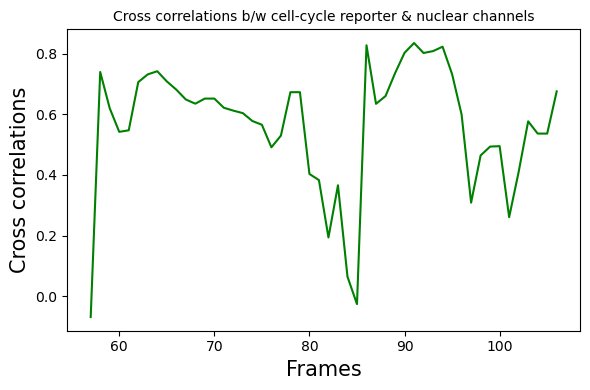

Full Trajectory Indices of Negative CC Values: [  76   96  112  113  121  128  166  234  236  252  255  271  341  352
  354  363  417  527  582  712 1019 1274 1472 1528 1626 1731 1752 1892
 1948 2659 2670 2824 2901 3603 3907]
Length of Trajectory of Negative CC Values: [ 51  15  41  33  36  23   2  51  93  51  52   8  50  52  52  20  34   3
  44  45   7  25  23   9   7  16   2  10   8  72  72  69  40 111  50]


In [14]:
plt.clf()
itraj_neg_cc_vals = []
ltraj_neg_cc_vals = []
for ind in range(len(frames_all_trajs_file)):
    negative_cc_vals = np.where(np.array(cc_all_trajs_file[ind]) < -0.01)
    if negative_cc_vals[0].size > 1: 
        itraj_neg_cc_vals.append(ind)
        ltraj_neg_cc_vals.append(len(frames_all_trajs_file[ind]))
        clear_output(wait = True)  # Clear the previous output (plot)
        fig, axs = plt.subplots(figsize = (6, 4)) 
        axs.plot(frames_all_trajs_file[ind], cc_all_trajs_file[ind], 'g')
        axs.set_title('Cross correlations b/w cell-cycle reporter & nuclear channels', fontsize=10)
        axs.set_xlabel('Frames', fontsize=15)
        axs.set_ylabel('Cross correlations', fontsize=15)
        fig.tight_layout()
        plt.show()
        time.sleep(0.5)
itraj_neg_cc_vals = np.array(itraj_neg_cc_vals)
ltraj_neg_cc_vals = np.array(ltraj_neg_cc_vals)
print(f"Full Trajectory Indices of Negative CC Values: {itraj_neg_cc_vals}")
print(f"Length of Trajectory of Negative CC Values: {ltraj_neg_cc_vals}")

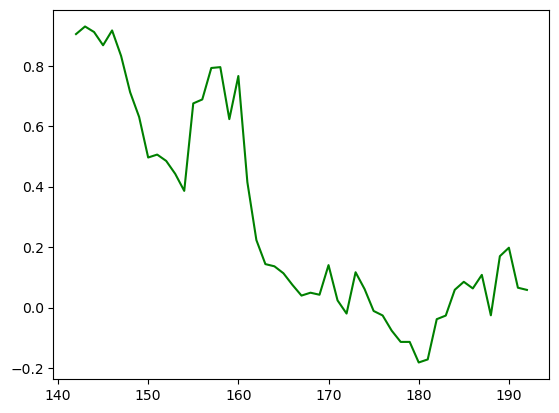

In [23]:
ind = 234
plt.plot(frames_all_trajs_file[ind], cc_all_trajs_file[ind], 'g')

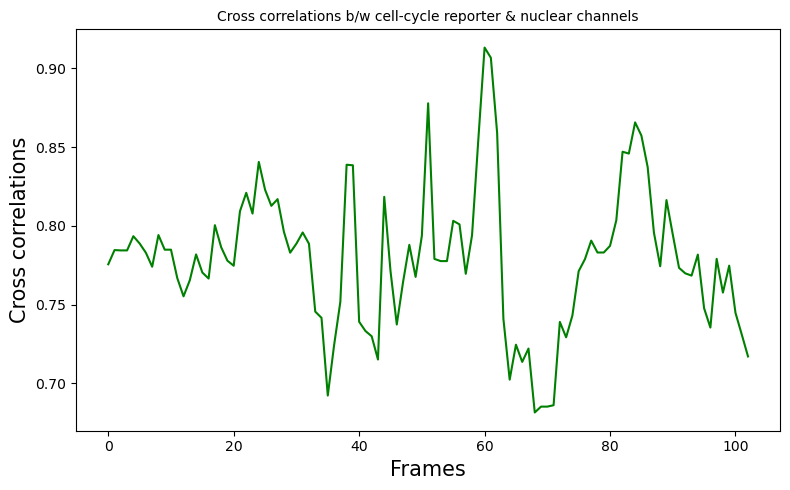

24 single-cell trajectories are larger than trajectory length 100.


In [6]:
plt.clf()
count = 0; tlen_cutoff = 100
for ind in range(len(frames_all_trajs_file)):
    if len(frames_all_trajs_file[ind]) >= tlen_cutoff: 
        count += 1
        clear_output(wait=True)  # Clear the previous output (plot)
        fig, axs = plt.subplots(figsize = (8, 5)) 
        axs.plot(frames_all_trajs_file[ind], cc_all_trajs_file[ind], 'g')
        axs.set_title('Cross correlations b/w cell-cycle reporter & nuclear channels', fontsize=10)
        axs.set_xlabel('Frames', fontsize=15)
        axs.set_ylabel('Cross correlations', fontsize=15)
        #plt.text(6, 0.73, 'OSM')
        fig.tight_layout()
        plt.show()
        time.sleep(3.0)
print(f"{count} single-cell trajectories are larger than trajectory length {tlen_cutoff}.")
#plt.savefig('cross_corr_OSM1_1.png', dpi = 300, bbox_inches='tight')
#plt.show()